In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Embedding, GlobalMaxPooling1D, Dropout, Bidirectional, LSTM
import feature_builder
import util

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
def prepare_for_cnn(df):
    processed = feature_builder.process_dataset(df)
    return processed.to_numpy().reshape(processed.shape[0], 1, processed.shape[1])

In [4]:
X_train = prepare_for_cnn(train_df)
y_train = train_df['target'].values

Armo el RNN sin el Embedding, pero le pongo el input shape

In [5]:
def RNN():
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
        Bidirectional(LSTM(32)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    return model

Compilo ni modelo

In [16]:
model = RNN()
model.summary()
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 1, 128)            193024    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 238,465
Trainable params: 238,465
Non-trainable params: 0
_________________________________________________________________


Entrenamos

Epoch 1/30
215/215 [==============================] - 3s 14ms/step - loss: 0.6743 - accuracy: 0.5744 - val_loss: 0.6615 - val_accuracy: 0.5341
Epoch 2/30
215/215 [==============================] - 1s 4ms/step - loss: 0.6442 - accuracy: 0.5745 - val_loss: 0.6242 - val_accuracy: 0.5341
Epoch 3/30
215/215 [==============================] - 1s 5ms/step - loss: 0.6126 - accuracy: 0.6028 - val_loss: 0.5979 - val_accuracy: 0.6181
Epoch 4/30
215/215 [==============================] - 1s 5ms/step - loss: 0.5942 - accuracy: 0.6399 - val_loss: 0.5739 - val_accuracy: 0.7087
Epoch 5/30
215/215 [==============================] - 1s 4ms/step - loss: 0.5698 - accuracy: 0.6742 - val_loss: 0.5472 - val_accuracy: 0.7257
Epoch 6/30
215/215 [==============================] - 1s 4ms/step - loss: 0.5447 - accuracy: 0.7157 - val_loss: 0.5190 - val_accuracy: 0.7585
Epoch 7/30
215/215 [==============================] - 1s 4ms/step - loss: 0.5237 - accuracy: 0.7408 - val_loss: 0.4986 - val_accuracy: 0.7717
Epoch

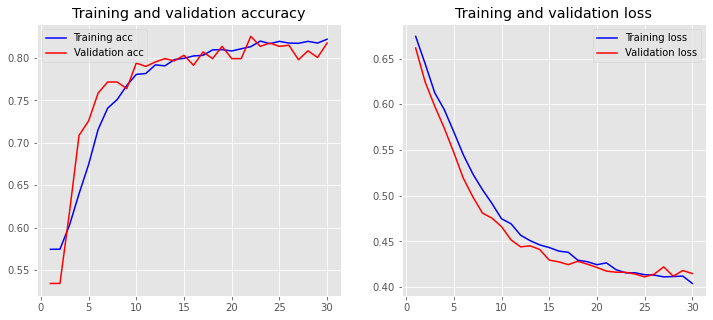

In [17]:
history = model.fit(X_train, y_train, epochs=30, shuffle=True, validation_split=0.1)
util.plot_history(history)

In [18]:
ids = test_df['id']

final_test = prepare_for_cnn(test_df)
prediction = model.predict_classes(final_test)

final_df = pd.DataFrame({'target': [x[0] for x in prediction]}, index=ids)
final_df

,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


In [19]:
final_df.to_csv('lstm.csv')